<a href="https://colab.research.google.com/github/shubahampurri/Project/blob/main/Copy_of_DAPM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# importing the required libraries
# directing to our data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [33]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [34]:
shopping_Data = pd.read_csv('customer_shopping_data.csv')
df = shopping_Data.copy()

In [35]:
# CREATING REQUIRD FUNCTIONS
# Handling missing Data

def missing_data(data):
    """ The stated function accepts a DataFrame as an argument and generates a fresh DataFrame that indicates
        the quantity and proportion of absent values for every column present in the initial DataFrame.
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False),2)
    return pd.concat([total, percent],keys=['Total', 'Percent'], axis=1).reset_index().rename({'index':'Columns'},axis = 1)

In [36]:
def show_missing(df):
    """Generate a Pandas dataframe that provides a detailed summary of a source dataframe,
       taking into account any missing data present in it."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output.sort_values("missing",ascending=False).reset_index(drop=True)

  #defining age categories
def age_cat(age):
      if age <=30:
        age= 'young'
      elif age >30 and age <=50:
        age= 'middle'
      else:
        age= 'old'  
      return age


In [37]:
# Defining Counts
def value_counts(df):
    """
    The function is designed to operate on a DataFrame, 
    and it outputs the value counts for categorical columns that have fewer than 20 distinct categories.
    It determines if the number of unique categories in a given column is less than 20. 
    If so, it displays the value counts for that column. 
    Otherwise, it displays a message indicating that there are too many categories.
    """
    col_names=[col for col in df.columns if df[col].dtype == "object"]
    
    for col in col_names:
    
        if df[col].nunique() < 20:
        
            print(df[col].value_counts())
            print("--"*10)
        else:
            print("{} there are too many classes".format(col) )
            print("--"*10)

# Creating a function for checking the distribution between 2 variables
def Distribution_df(dataframe,col):
    """
    The input parameters of this function are a dataframe and the name of a column. 
    The function groups the dataframe by the unique values in the specified column
    and aggregates the total_price and quantity for each group. 
    The results are used to create a new dataframe with a column added, named 'avg_revenue,' 
    which represents the average revenue calculated by dividing the total_price by the quantity. 
    Finally, the new dataframe is returned as output. """
    data = dataframe.groupby(by=col).agg({'total_price':np.sum,'quantity': sum})
    df = pd.DataFrame(data)
    df.reset_index(inplace=True)
    df['avg_revenue'] = df['total_price'] / df['quantity']
    return df
# Functions for variours plots.
def bar_plot(dataframe,col1):
    """
   The purpose of this function is to produce a bar plot utilizing Plotly Express library,
   with a dataframe and a column name passed in as input parameters. 
   The column specified is used as the x-axis variable while the 'avg_revenue' column is the y-axis variable. Furthermore, the 'category' column is employed as the color variable. 
   The outcome is a graphical representation of the average revenue for each category,
   relative to the values in the specified column.
    """
    fig = px.bar(dataframe, x=col1, y=dataframe.avg_revenue.astype(int),
             color='category', barmode='group',text='avg_revenue',
             height=600)
    fig.update_layout(yaxis_title ='Average Revenue',
                  xaxis_title=col1,
                  title='Average Revenue By Categories Relative to '+ col1,
                  title_x=0.5,
                 )
    fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
    fig.show()  

def basic_bar_plot(dataframe,colx,coly):
    """
    This function creates a basic bar plot. 
    It takes a dataframe and the column names for the x-axis and y-axis as arguments,
    And displays a bar chart with the specified data.
    """
    fig = px.bar(dataframe, x=colx, y=coly,
             text=dataframe[coly],
             height=500)
    fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
    fig.show()

# Defining Counts
def value_counts(df):
    """
    The function is designed to operate on a DataFrame, 
    and it outputs the value counts for categorical columns that have fewer than 20 distinct categories.
    It determines if the number of unique categories in a given column is less than 20. 
    If so, it displays the value counts for that column. 
    Otherwise, it displays a message indicating that there are too many categories.
    """
    col_names=[col for col in df.columns if df[col].dtype == "object"]
    
    for col in col_names:
    
        if df[col].nunique() < 20:
        
            print(df[col].value_counts())
            print("--"*10)
        else:
            print("{} there are too many classes".format(col) )
            print("--"*10)
def pivot_bar_plot(dataframe,colx,coly,colvalues):
    
    """
    The function pivot_bar_plot takes a dataframe, a column for the x-axis, a column for the y-axis, and a column for the values,
    Plots a bar chart with the aggregated count of values.
    """
    dataframe.pivot_table(index=colx,columns=coly,values=colvalues,
                   aggfunc=(['count'])).plot(kind='bar', figsize=(10,10))
                                             
    plt.show()

# Creating a function for checking the distribution between 2 variables
def Distribution_df(dataframe,col):
    """
    The input parameters of this function are a dataframe and the name of a column. 
    The function groups the dataframe by the unique values in the specified column
    and aggregates the total_price and quantity for each group. 
    The results are used to create a new dataframe with a column added, named 'avg_revenue,' 
    which represents the average revenue calculated by dividing the total_price by the quantity. 
    Finally, the new dataframe is returned as output. """
    data = dataframe.groupby(by=col).agg({'total_price':np.sum,'quantity': sum})
    df = pd.DataFrame(data)
    df.reset_index(inplace=True)
    df['avg_revenue'] = df['total_price'] / df['quantity']
    return df
    
def line_plot(df,colx,coly):
    """
    This function takes a dataframe df and two column names colx and coly as input.
    It then creates a line plot using plotly with colx and coly as the x and y axes, respectively.
    Finally, it displays the plot 
    """
    fig = px.line(df, x=df[colx], y=df[coly])
    fig.show()

In [38]:
#DATA PREPARTION AND CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [39]:
# Any duplicated value 
df[df.duplicated() == True]
# Miisng Value
show_missing(df)
# Df  object type value counts
value_counts(df)

invoice_no there are too many classes
--------------------
customer_id there are too many classes
--------------------
Female    59482
Male      39975
Name: gender, dtype: int64
--------------------
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64
--------------------
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
--------------------
invoice_date there are too many classes
--------------------
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64
--------------------


In [40]:
#DATA TRANSFORMATION

# change type
df['invoice_date'] = df['invoice_date'].astype('datetime64')

# drop columns
df.drop(['customer_id','invoice_no','shopping_mall'],axis=1,inplace=True)

#CREATING NEW COLOUMNS

# Year
df['year'] = df['invoice_date'].dt.strftime("%Y")

# Month
df['month'] = df['invoice_date'].dt.strftime("%m")

# Weekday
df['weekday'] = df['invoice_date'].dt.strftime("%w")

# Day
df['day'] = df['invoice_date'].dt.strftime("%d")

# Total Price
df['total_price'] = df['quantity'] * df['price']

# Age  cat
df['age_cat'] = df['age'].apply(age_cat)

In [41]:
#EDA

#Distribution by Gender
gender_df=Distribution_df(df,'gender')
gender_df

,gender,total_price,quantity,avg_revenue
0,Female,150207136.02,178659,840.75
1,Male,101298658.23,120053,843.78


In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Female","Male"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[gender_df['quantity'][0], gender_df['quantity'][1]]),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[gender_df['total_price'][0], gender_df['total_price'][1]]),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.65, hoverinfo="label+percent+value")

fig.update_layout(
    title_text="Gender Distribution",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Count', x=0.2, y=0.5, font_size=20, showarrow=False),
                 dict(text='Revenue', x=0.815, y=0.5, font_size=20, showarrow=False),
                 ])
fig.show()

In [43]:
# Distribution of purchase categories relative to gender
gender_cat_df = Distribution_df(df,['gender','category'])
gender_cat_df

,gender,category,total_price,quantity,avg_revenue
0,Female,Books,489314.70,8776,55.76
1,Female,Clothing,68251695.60,62039,1100.14
2,Female,Cosmetics,4066772.54,27261,149.18
3,Female,Food & Beverage,505322.60,26362,19.17
4,Female,Shoes,39425167.30,17906,2201.79
5,Female,Souvenir,382867.20,8976,42.65
6,Female,Technology,34669950.00,8977,3862.09
7,Female,Toys,2416046.08,18362,131.58
8,Male,Books,345238.20,6206,55.63
9,Male,Clothing,45745095.44,41519,1101.79


In [44]:
bar_plot(gender_cat_df,'gender')

In [45]:
# Distribution by age
age_cat_df = Distribution_df(df,'age_cat')
age_cat_df

,age_cat,total_price,quantity,avg_revenue
0,middle,97150259.90,115006,844.74
1,old,91308132.24,108534,841.29
2,young,63047402.11,75172,838.71


In [46]:
basic_bar_plot(age_cat_df,'age_cat','quantity')

In [47]:
# Distribution of purchase categories relative to age cat
age_cat_Cat_df = Distribution_df(df,['age_cat','category'])
age_cat_Cat_df

,age_cat,category,total_price,quantity,avg_revenue
0,middle,Books,317059.20,5700,55.62
1,middle,Clothing,43688347.12,39777,1098.33
2,middle,Cosmetics,2629238.24,17566,149.68
3,middle,Food & Beverage,330473.24,17218,19.19
4,middle,Shoes,25652466.14,11634,2204.96
5,middle,Souvenir,243937.08,5708,42.74
6,middle,Technology,22785000.00,5930,3842.33
7,middle,Toys,1503738.88,11473,131.07
8,old,Books,300045.75,5443,55.13
9,old,Clothing,41588987.44,37687,1103.54


In [48]:
bar_plot(age_cat_Cat_df,'age_cat')

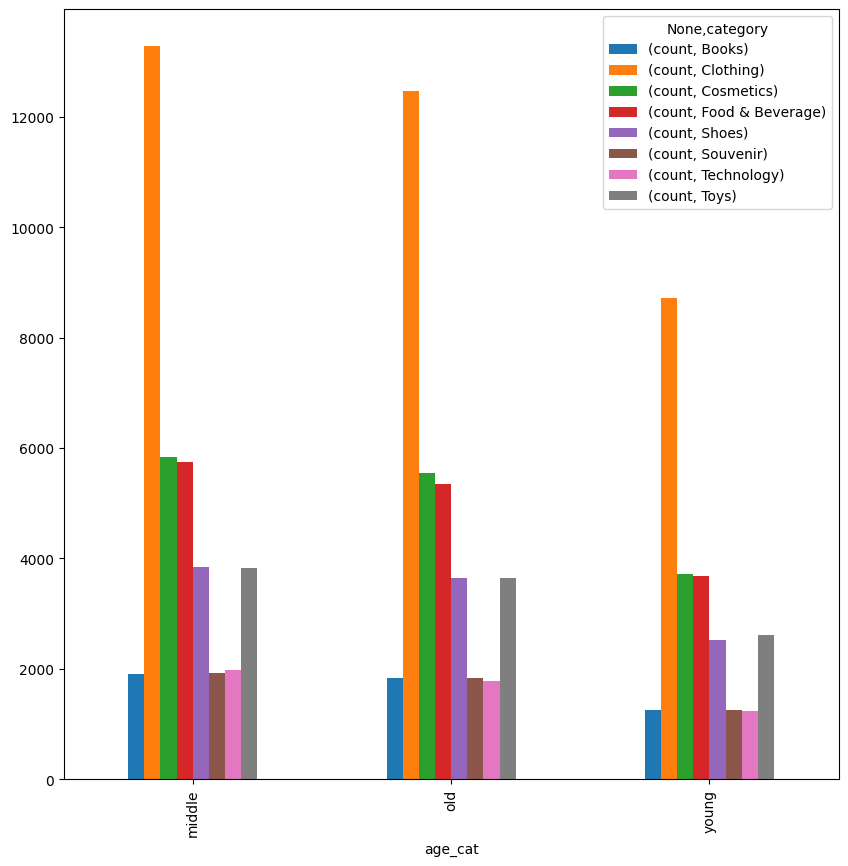

In [49]:
pivot_bar_plot(df,'age_cat','category','quantity')

In [50]:
# Regression analysis
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Prepare data for regression
X = df[['age', 'gender']]
y = df['quantity']

# Create and fit the model
model = LinearRegression().fit(X, y)

# Print coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

Coefficients: [6.28144655e-05 3.74784059e-04]
Intercept: 3.0004766218334544
                                 OLS Regression Results                                
Dep. Variable:               quantity   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                          1.442e+05
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:35:20   Log-Likelihood:                     -1.9277e+05
No. Observations:               99457   AIC:                                  3.855e+05
Df Residuals:                   99455   BIC:                                  3.856e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

In [51]:
# Distribution by Time
# Yearly distribution
Distribution_df(df,'year')

,year,total_price,quantity,avg_revenue
0,2021,114560570.59,136096,841.76
1,2022,115436814.08,137147,841.70
2,2023,21508409.58,25469,844.49


In [52]:
line_plot(Distribution_df(df,'year'),'year','avg_revenue')

In [53]:
Distribution_df(df,'month')

,month,total_price,quantity,avg_revenue
0,01,25755677.45,30897,833.60
1,02,23980067.68,27945,858.12
2,03,20826196.84,24644,845.08
3,04,20360575.14,23819,854.80
4,05,20608277.98,24379,845.33
5,06,20344057.02,23982,848.31
6,07,20721536.72,24714,838.45
7,08,19812561.97,23943,827.49
8,09,19248108.83,22992,837.17
9,10,21049007.84,24167,870.98


In [54]:
line_plot(Distribution_df(df,'month'),'month','avg_revenue')

In [55]:
Distribution_df(df,'weekday')

,weekday,total_price,quantity,avg_revenue
0,0,34130252.87,41537,821.68
1,1,37578624.06,43774,858.47
2,2,35510654.19,42780,830.08
3,3,35635928.14,42133,845.80
4,4,35679669.44,42408,841.34
5,5,36461538.67,43146,845.07
6,6,36509126.88,42934,850.35


In [56]:
line_plot(Distribution_df(df,'weekday'),'weekday','avg_revenue')